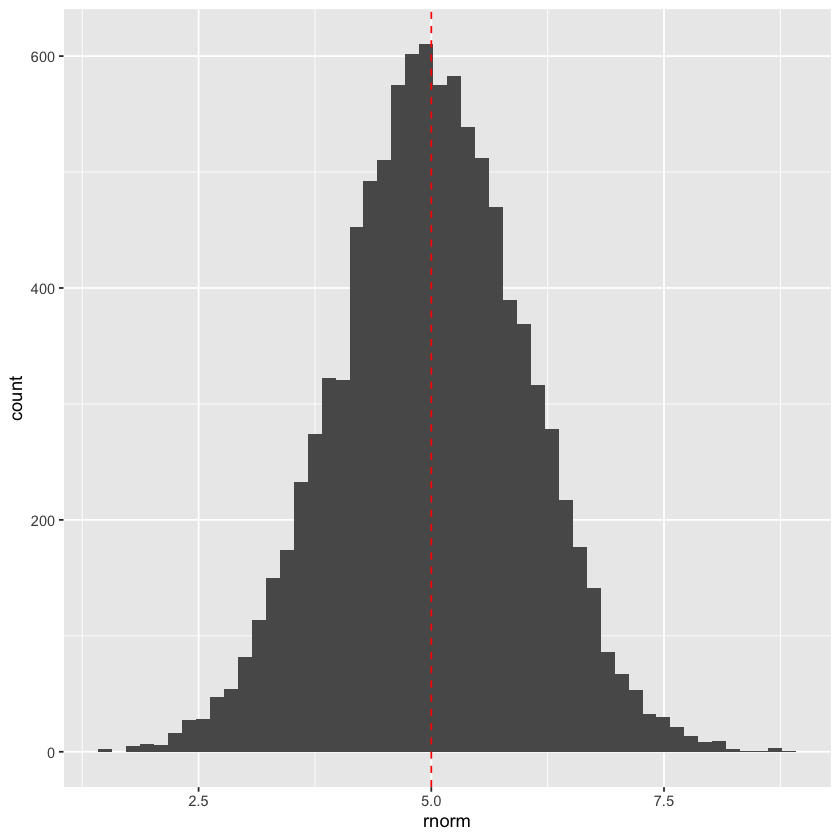

In [12]:
library(ggplot2)

set.seed(10)
df.rnorm <- data.frame(rnorm = rnorm(10000, mean = 5))

ggplot(data = df.rnorm, aes(x = rnorm)) +
  geom_histogram(bins = 50) +
  geom_vline(xintercept = 5, color = "red", linetype = "dashed") 

We want to add an annotation that explicitly calls out the value of the mean.

### Add an annotation with the annotate() function

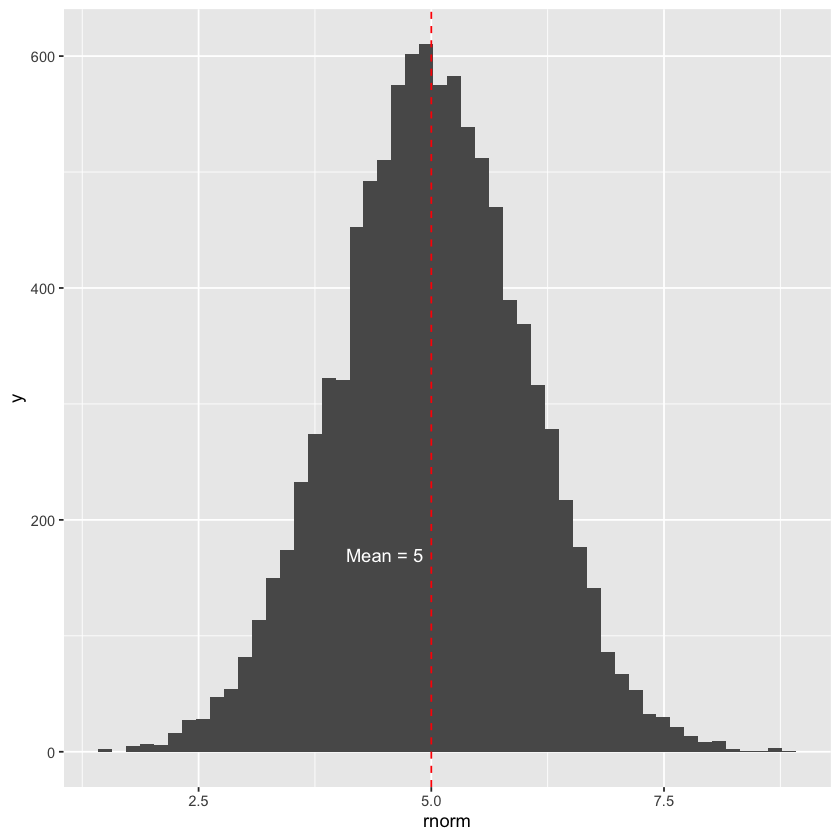

In [11]:
ggplot(data = df.rnorm, aes(x = rnorm)) +
  geom_histogram(bins = 50) +
  geom_vline(xintercept = 5, color = "red", linetype = "dashed") +
  annotate("text", label = "Mean = 5", x = 4.5, y = 170, color = "white")

Here, we’ve added the annotation that says “Mean = 5.”

## Annotations

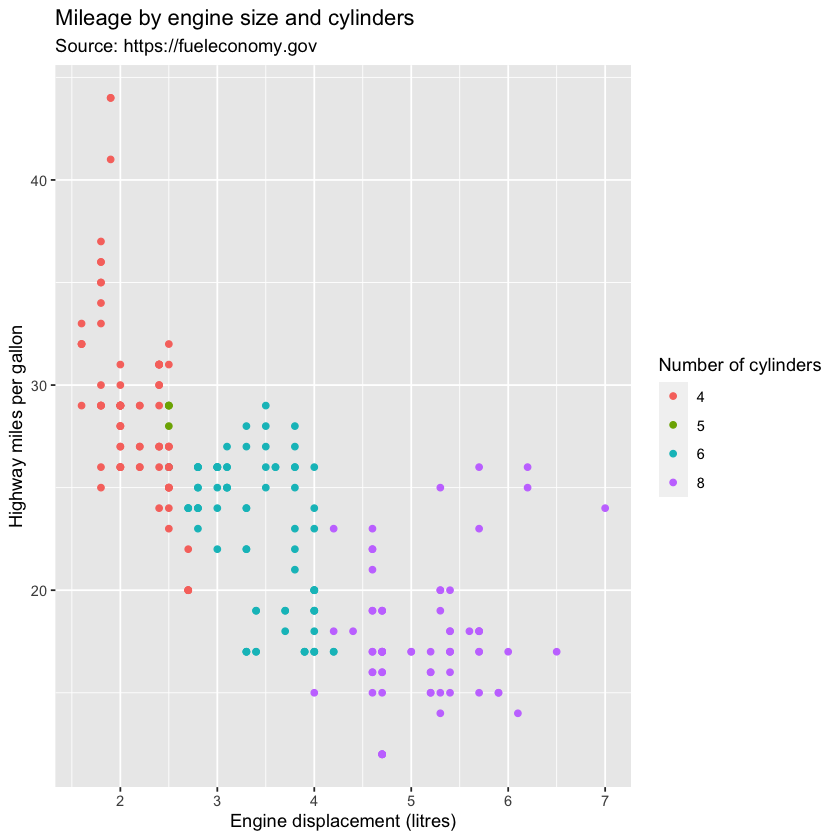

In [13]:
ggplot(mpg, aes(displ, hwy)) + 
  geom_point(aes(colour = factor(cyl))) + 
  labs(
    x = "Engine displacement (litres)", 
    y = "Highway miles per gallon", 
    colour = "Number of cylinders",
    title = "Mileage by engine size and cylinders",
    subtitle = "Source: https://fueleconomy.gov"
  )

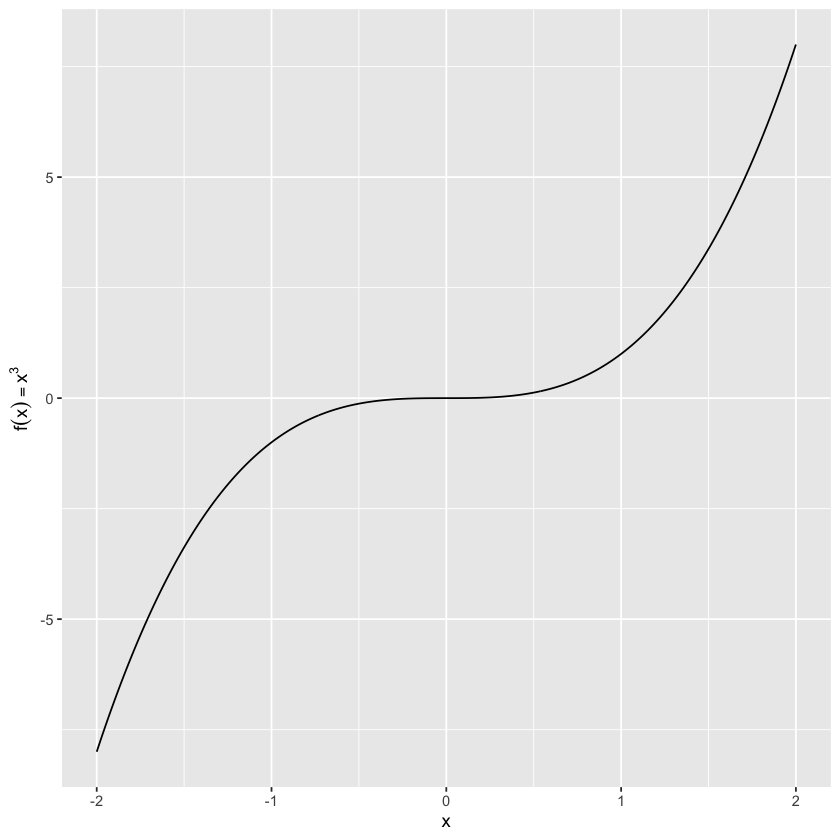

In [14]:
values <- seq(from = -2, to = 2, by = .01)
df <- data.frame(x = values, y = values ^ 3)
ggplot(df, aes(x, y)) + 
  geom_path() + 
  labs(y = quote(f(x) == x^3))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



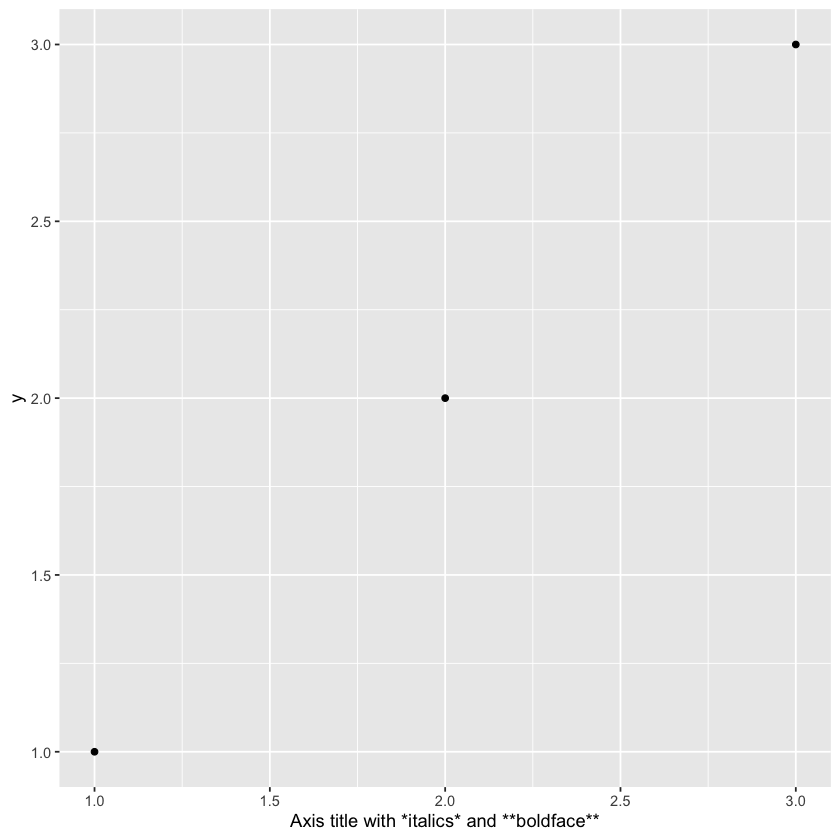

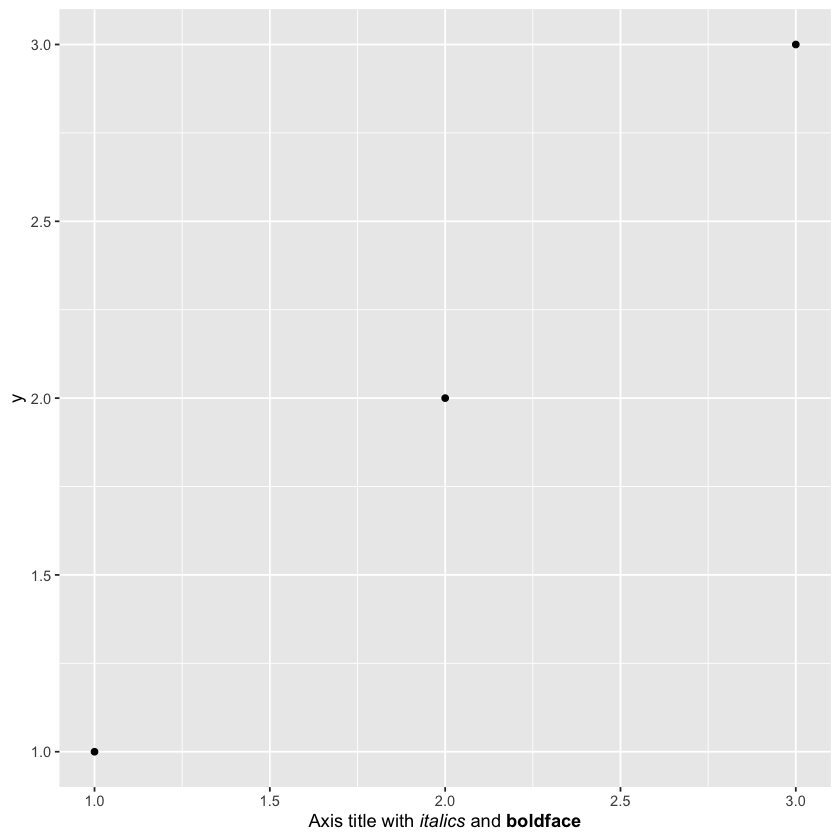

In [18]:
install.packages("ggtext")
library(ggtext)
df <- data.frame(x = 1:3, y = 1:3)
base <- ggplot(df, aes(x, y)) + 
  geom_point() + 
  labs(x = "Axis title with *italics* and **boldface**")

base 
base + theme(axis.title.x = ggtext::element_markdown())

## Text Labels

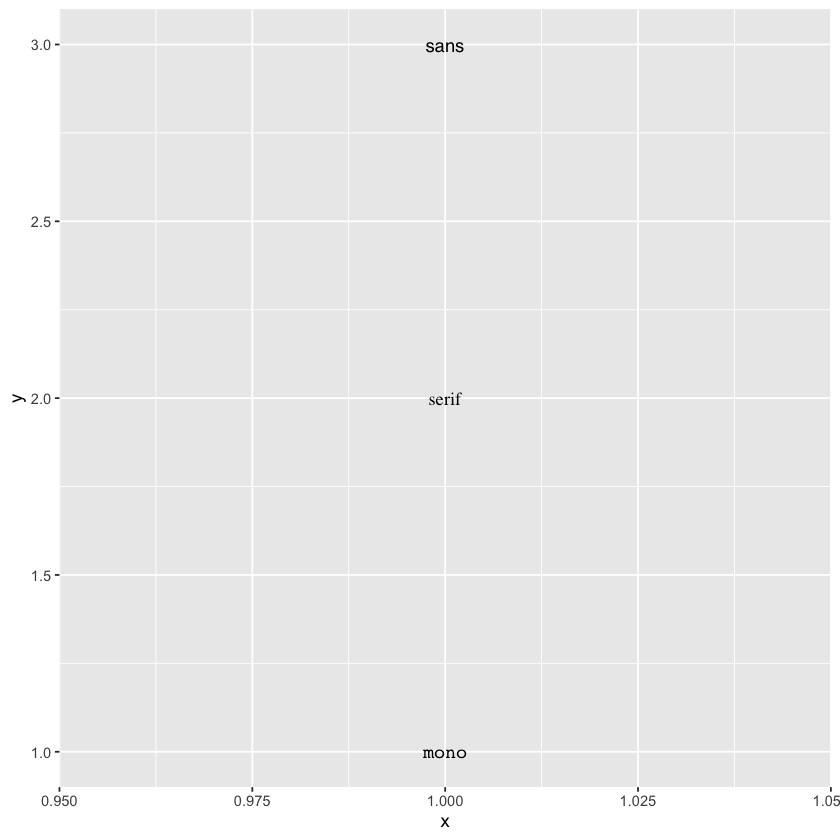

In [19]:
df <- data.frame(x = 1, y = 3:1, family = c("sans", "serif", "mono"))
ggplot(df, aes(x, y)) + 
  geom_text(aes(label = family, family = family))

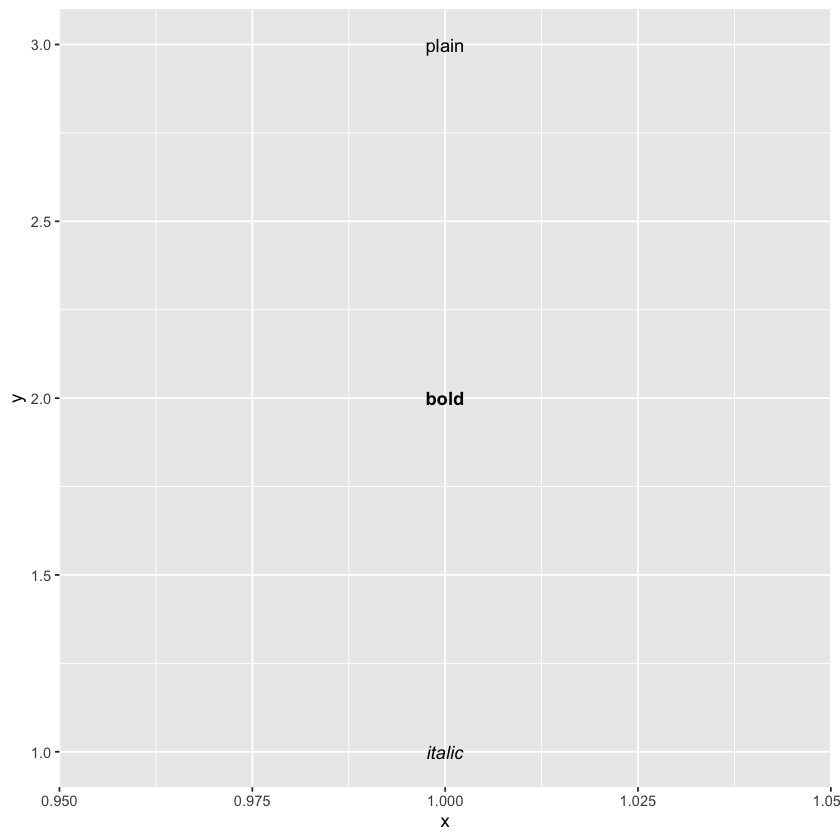

In [20]:
df <- data.frame(x = 1, y = 3:1, face = c("plain", "bold", "italic"))
ggplot(df, aes(x, y)) + 
  geom_text(aes(label = face, fontface = face))

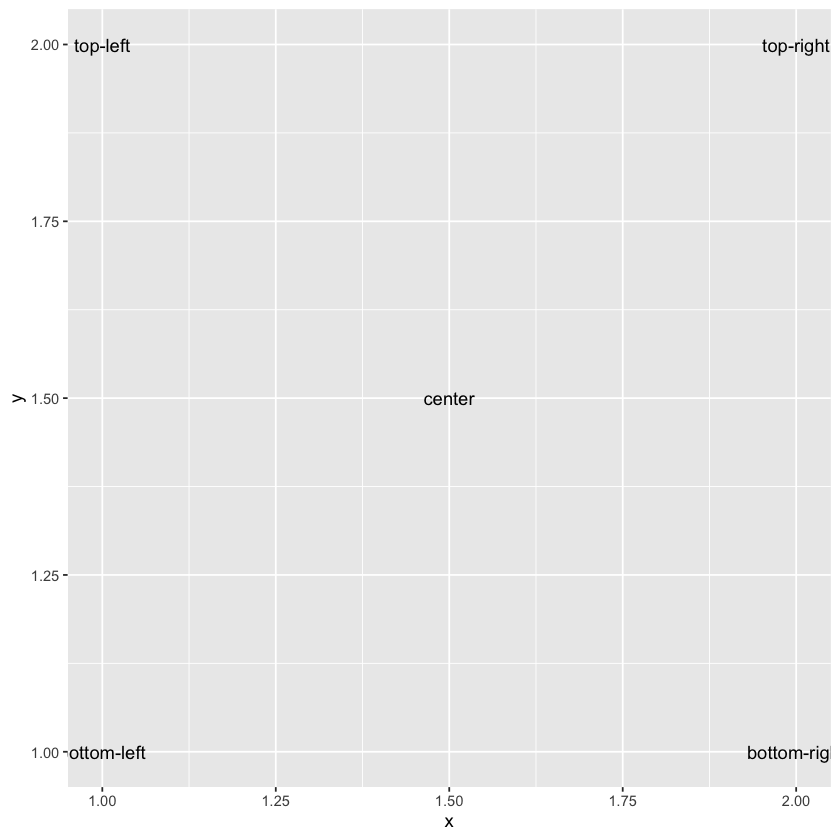

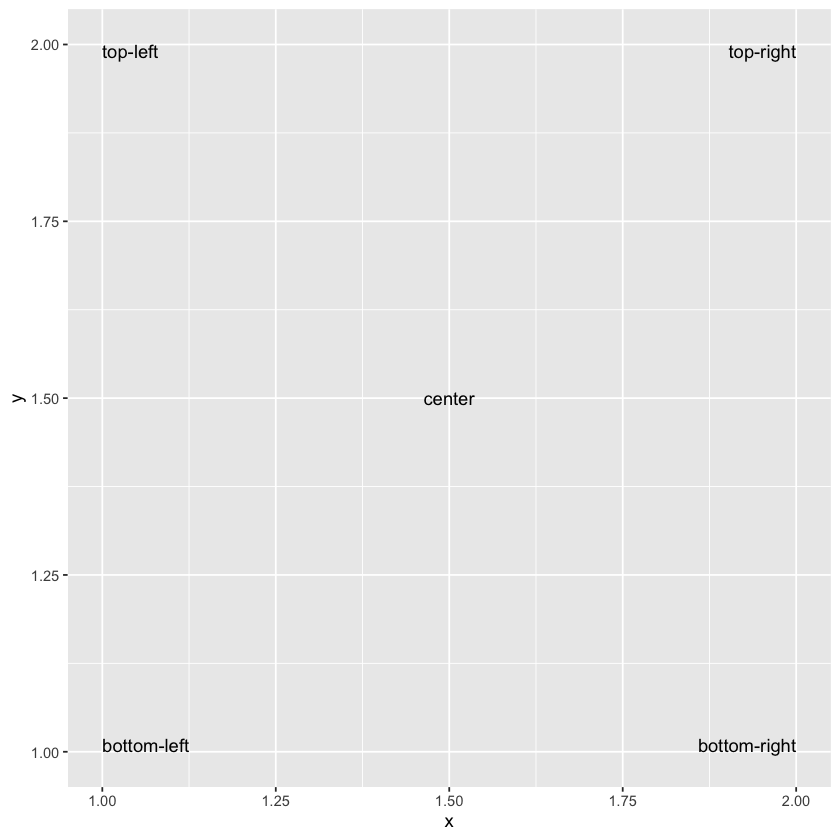

In [21]:
df <- data.frame(
  x = c(1, 1, 2, 2, 1.5),
  y = c(1, 2, 1, 2, 1.5),
  text = c(
    "bottom-left", "top-left",  
    "bottom-right", "top-right", "center"
  )
)
ggplot(df, aes(x, y)) +
  geom_text(aes(label = text))
ggplot(df, aes(x, y)) +
  geom_text(aes(label = text), vjust = "inward", hjust = "inward")

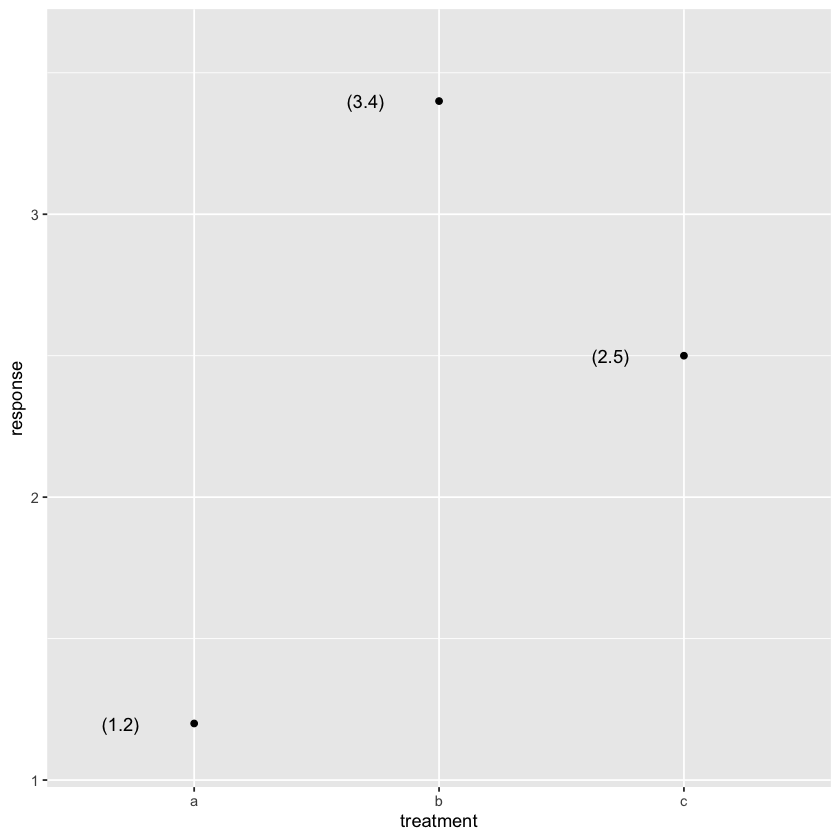

In [22]:
df <- data.frame(
  treatment = c("a", "b", "c"), 
  response = c(1.2, 3.4, 2.5)
)

ggplot(df, aes(treatment, response)) + 
  geom_point() + 
  geom_text(
    mapping = aes(label = paste0("(", response, ")")), 
    nudge_x = -0.3
  ) + 
  ylim(1.1, 3.6)

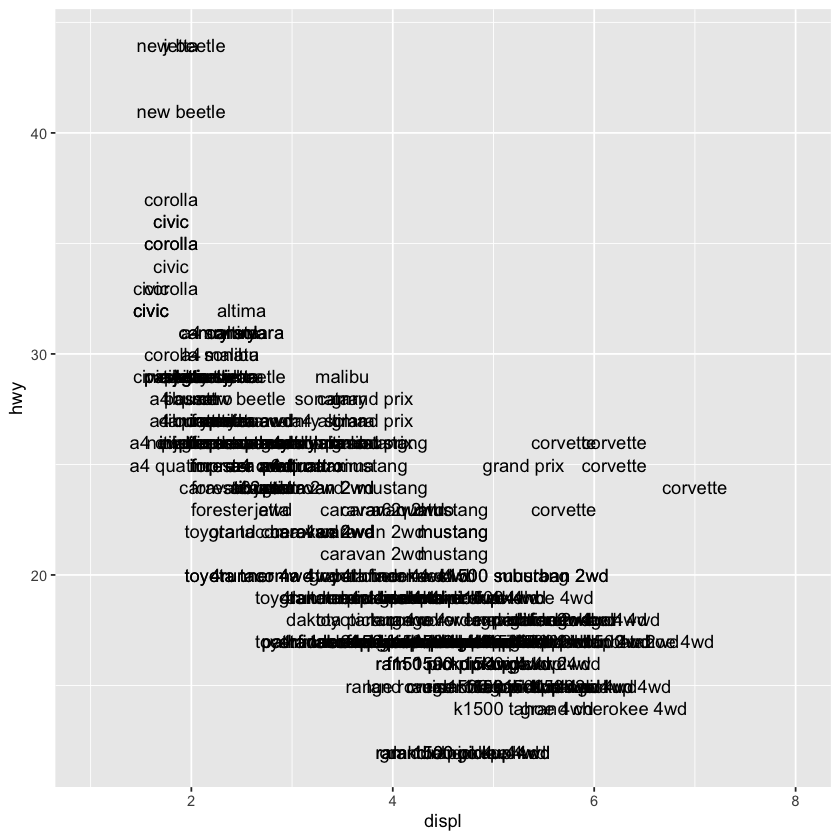

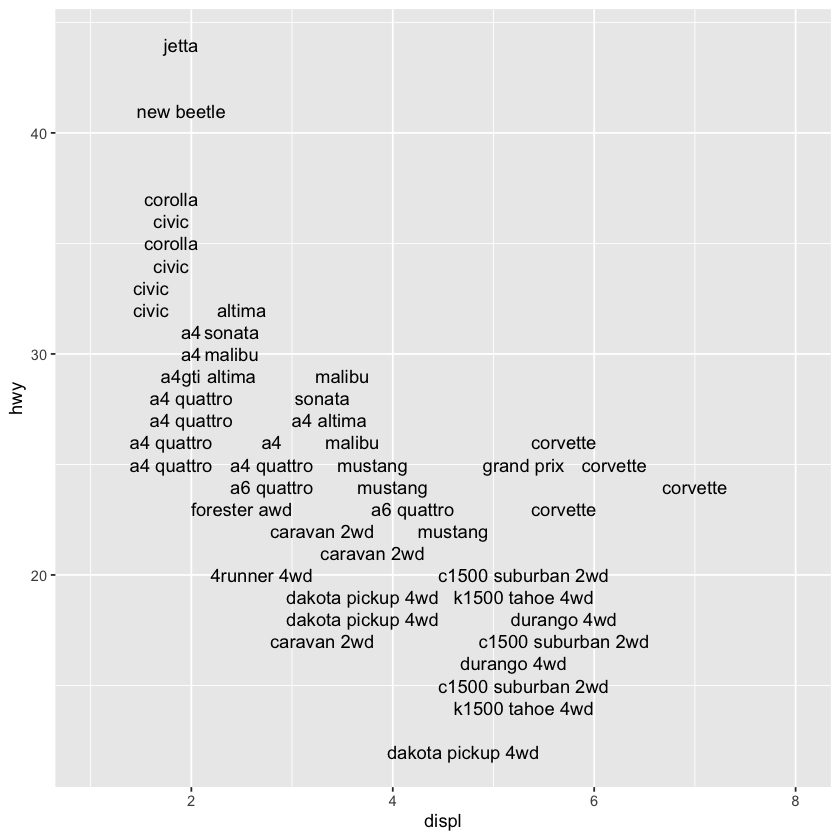

In [23]:
ggplot(mpg, aes(displ, hwy)) + 
  geom_text(aes(label = model)) + 
  xlim(1, 8)

ggplot(mpg, aes(displ, hwy)) + 
  geom_text(aes(label = model), check_overlap = TRUE) + 
  xlim(1, 8)

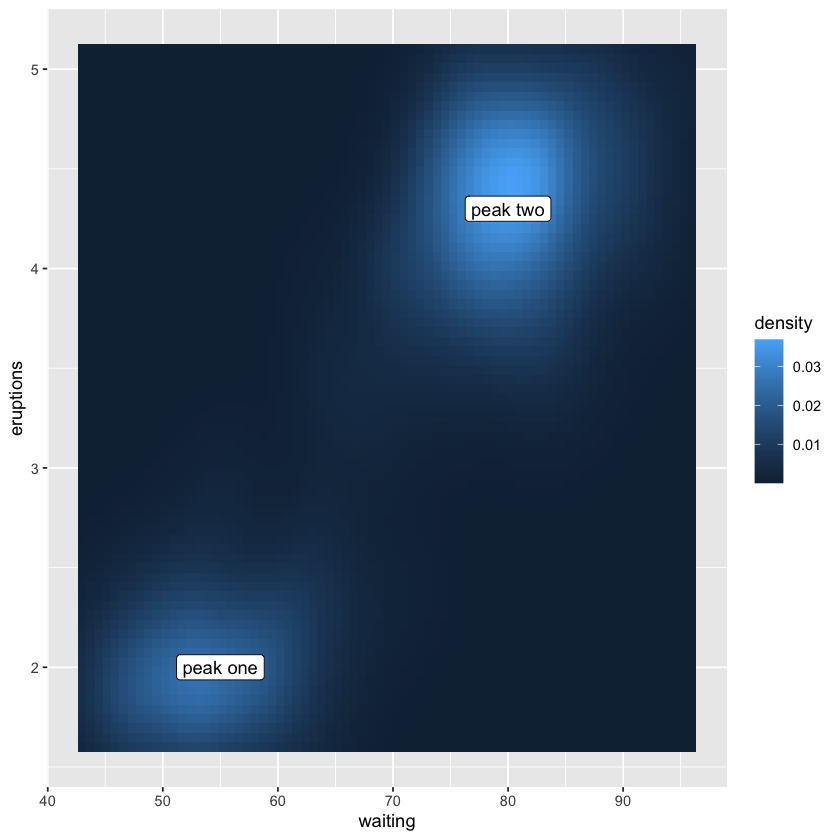

In [24]:
label <- data.frame(
  waiting = c(55, 80), 
  eruptions = c(2, 4.3), 
  label = c("peak one", "peak two")
)

ggplot(faithfuld, aes(waiting, eruptions)) +
  geom_tile(aes(fill = density)) + 
  geom_label(data = label, aes(label = label))

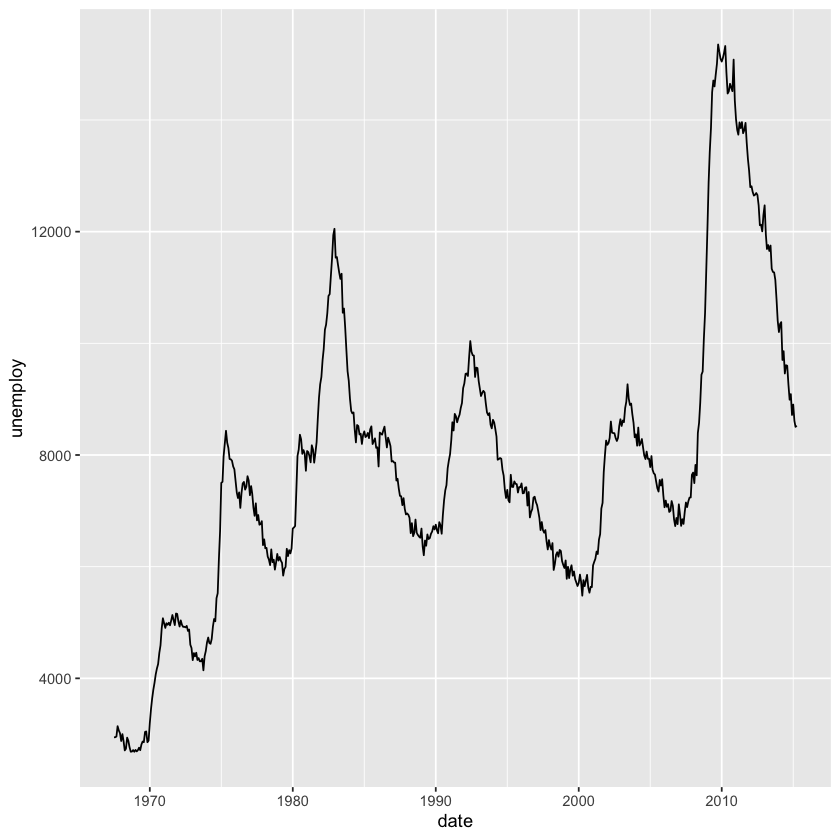

In [25]:
ggplot(economics, aes(date, unemploy)) + 
  geom_line()

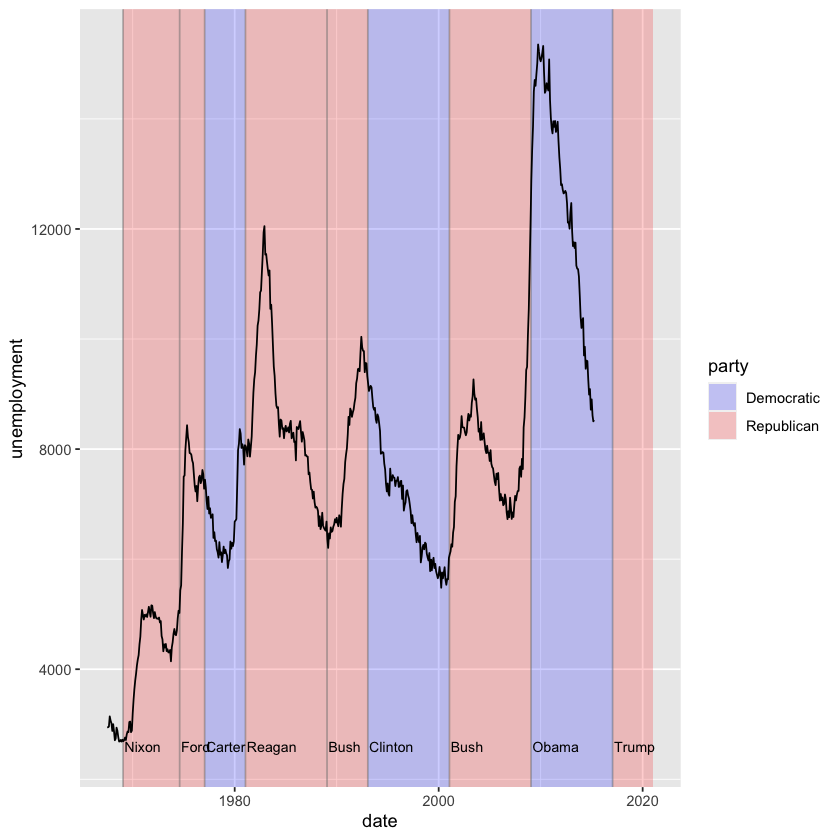

In [26]:
presidential <- subset(presidential, start > economics$date[1])

ggplot(economics) + 
  geom_rect(
    aes(xmin = start, xmax = end, fill = party), 
    ymin = -Inf, ymax = Inf, alpha = 0.2, 
    data = presidential
  ) + 
  geom_vline(
    aes(xintercept = as.numeric(start)), 
    data = presidential,
    colour = "grey50", alpha = 0.5
  ) + 
  geom_text(
    aes(x = start, y = 2500, label = name), 
    data = presidential, 
    size = 3, vjust = 0, hjust = 0, nudge_x = 50
  ) + 
  geom_line(aes(date, unemploy)) + 
  scale_fill_manual(values = c("blue", "red")) +
  xlab("date") + 
  ylab("unemployment")

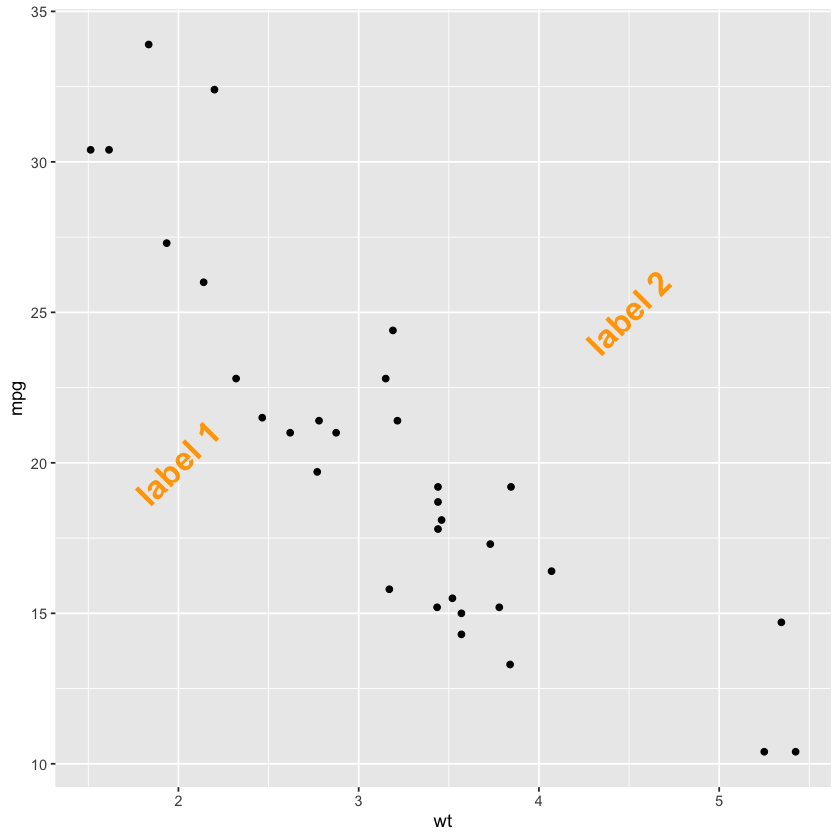

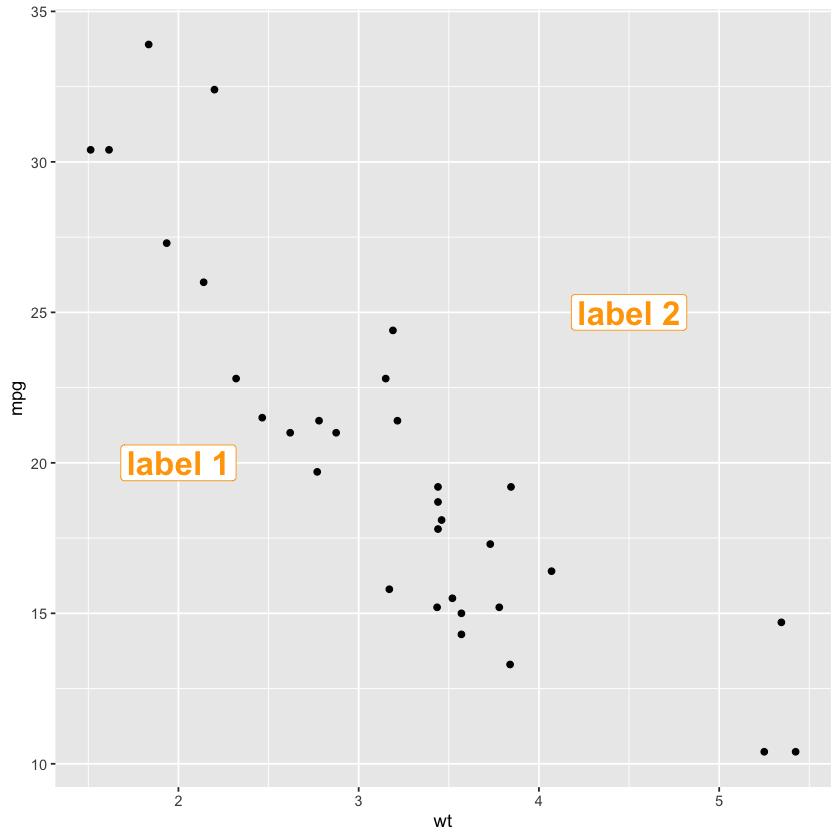

In [27]:
# library
library(ggplot2)

# basic graph
p <- ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point()
 
# a data frame with all the annotation info
annotation <- data.frame(
   x = c(2,4.5),
   y = c(20,25),
   label = c("label 1", "label 2")
)

# Add text
p + geom_text(data=annotation, aes( x=x, y=y, label=label),                 , 
           color="orange", 
           size=7 , angle=45, fontface="bold" )

# Note: possible to shorten with annotate:
# p +
#  annotate("text", x = c(2,4.5), y = c(20,25), 
#           label = c("label 1", "label 2") , color="orange", 
#           size=7 , angle=45, fontface="bold")
# Right chart: using labels
p + geom_label(data=annotation, aes( x=x, y=y, label=label),                 , 
           color="orange", 
           size=7 , angle=45, fontface="bold" )

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


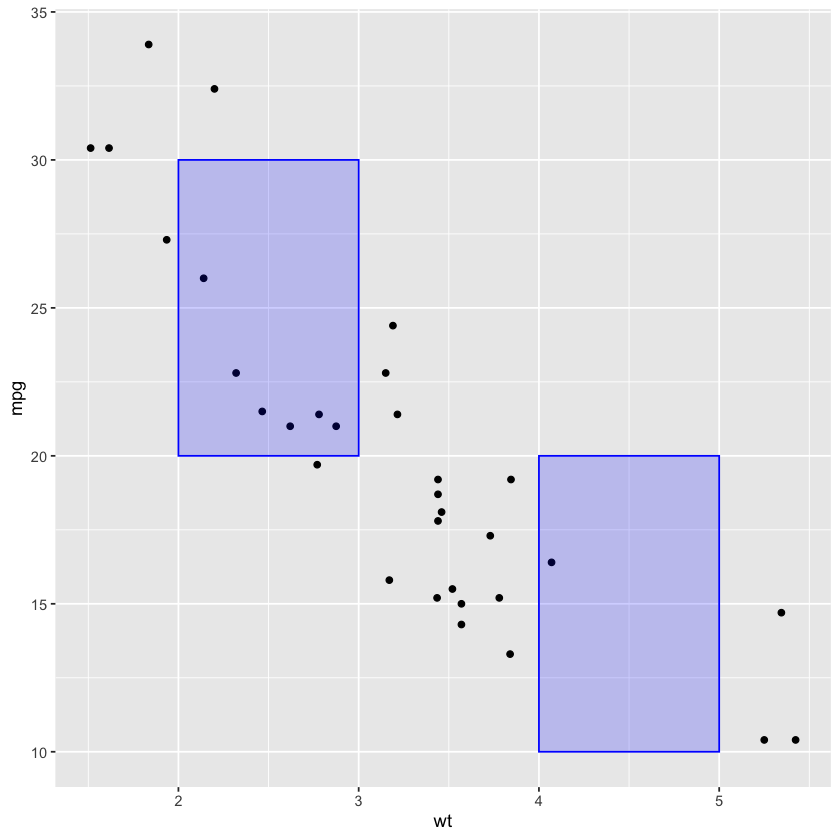

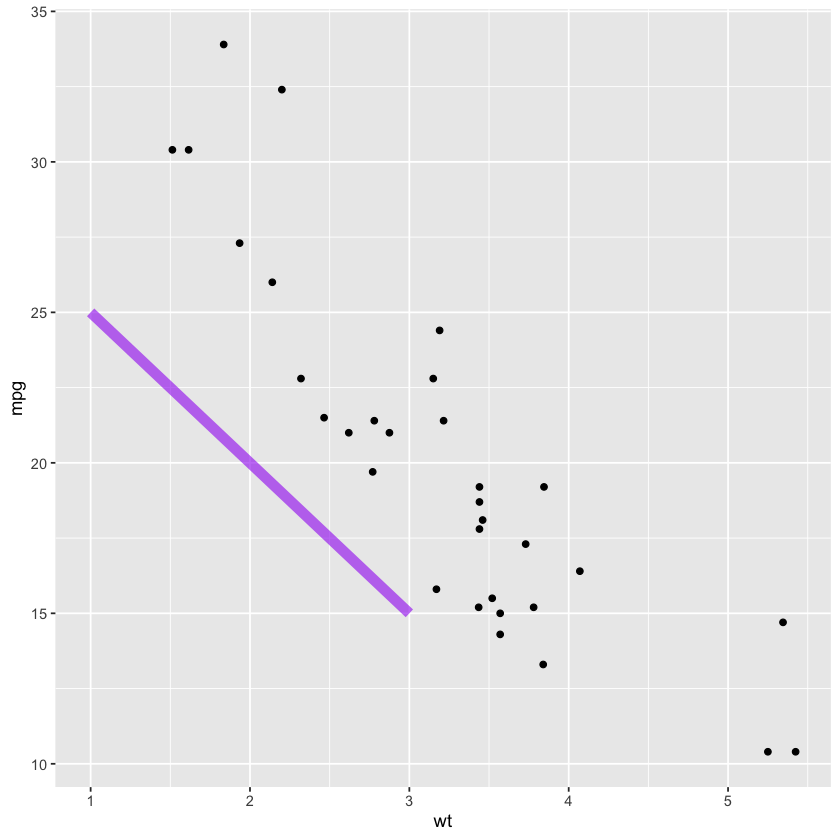

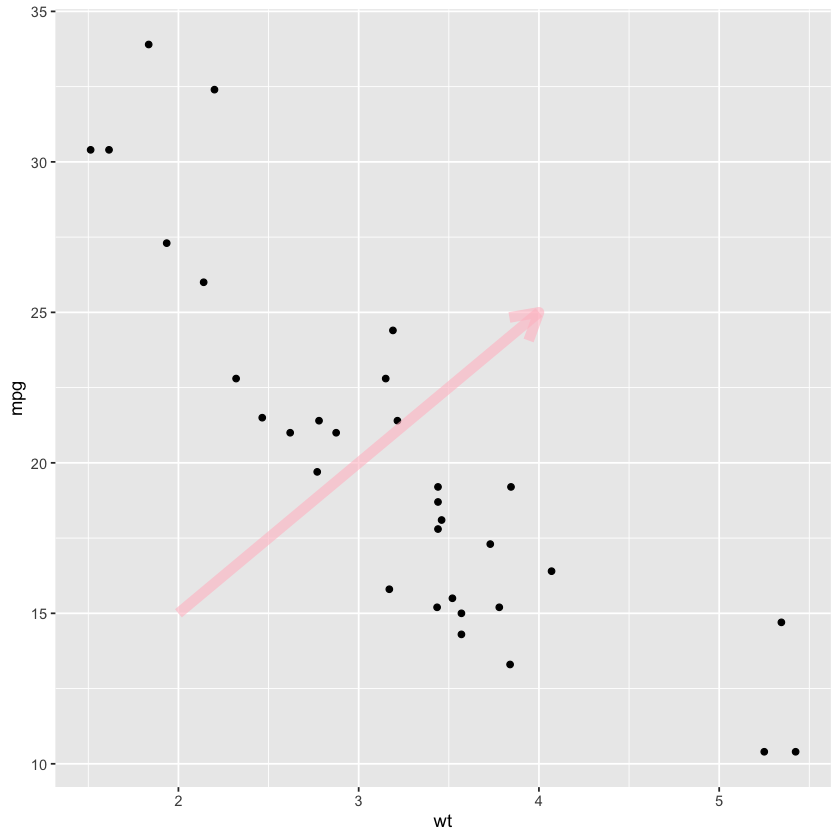

In [28]:
# Add rectangles
p + annotate("rect", xmin=c(2,4), xmax=c(3,5), ymin=c(20,10) , ymax=c(30,20), alpha=0.2, color="blue", fill="blue")
# Add segments
p + annotate("segment", x = 1, xend = 3, y = 25, yend = 15, colour = "purple", size=3, alpha=0.6)
# Add arrow
p + annotate("segment", x = 2, xend = 4, y = 15, yend = 25, colour = "pink", size=3, alpha=0.6, arrow=arrow())

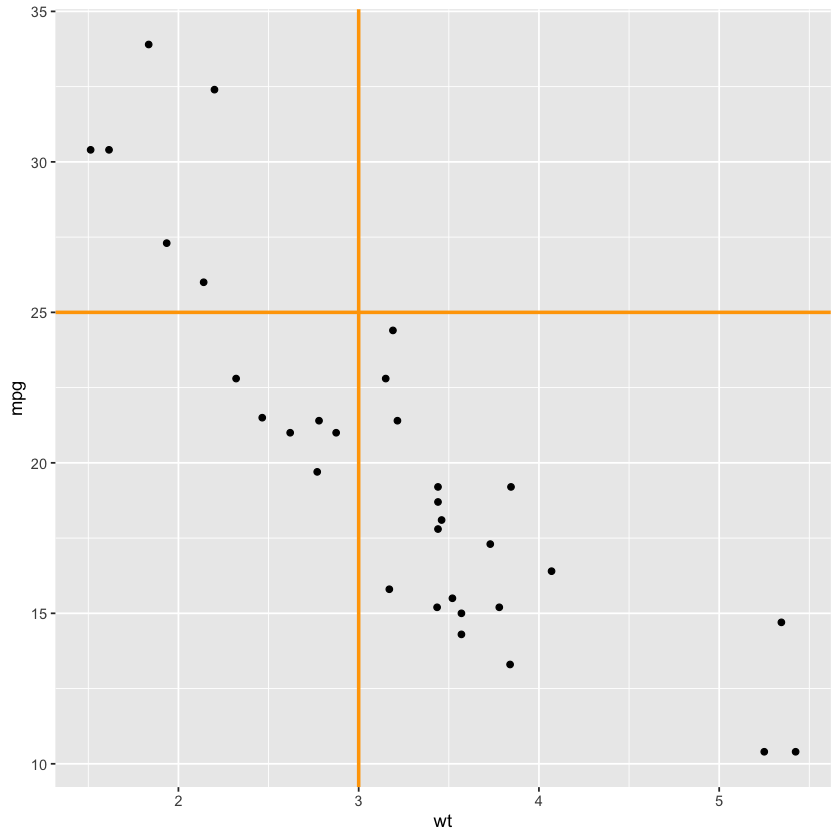

In [33]:
p + 
  # horizontal
  geom_hline(yintercept=25, color="orange", size=1) + 
  # vertical
  geom_vline(xintercept=3, color="orange", size=1)

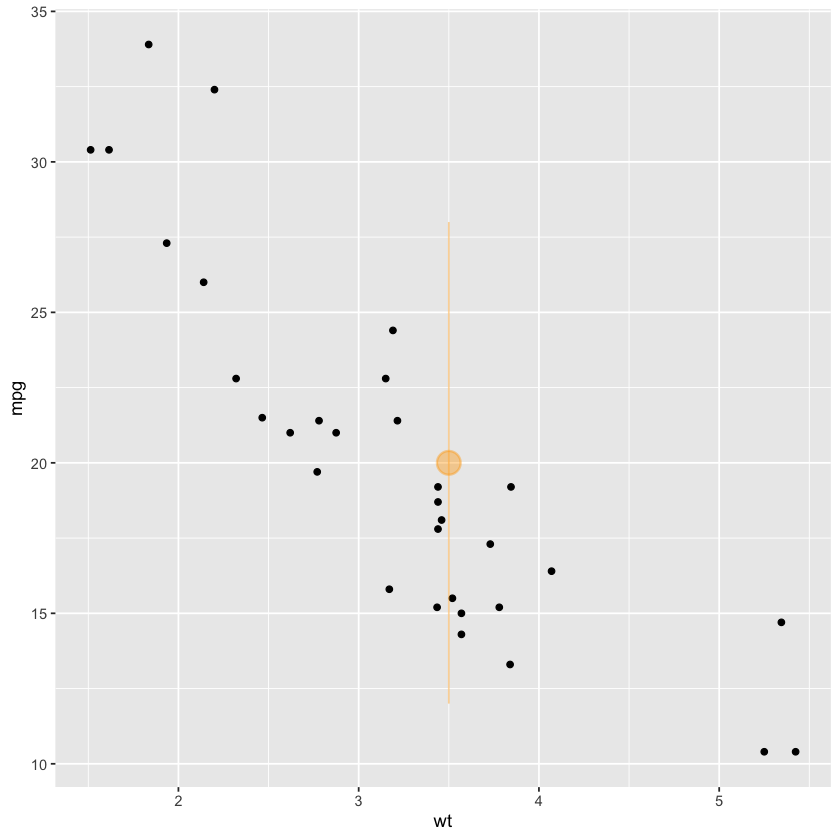

In [34]:
# Add point and range
p + annotate("pointrange", x = 3.5, y = 20, ymin = 12, ymax = 28,colour = "orange", size = 1.5, alpha=0.4)

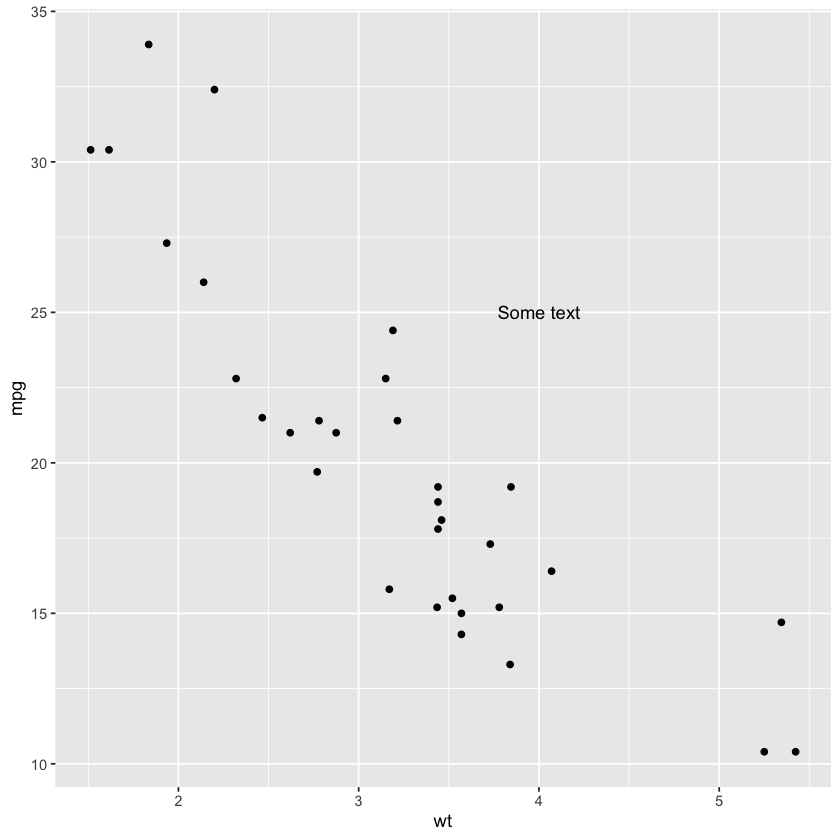

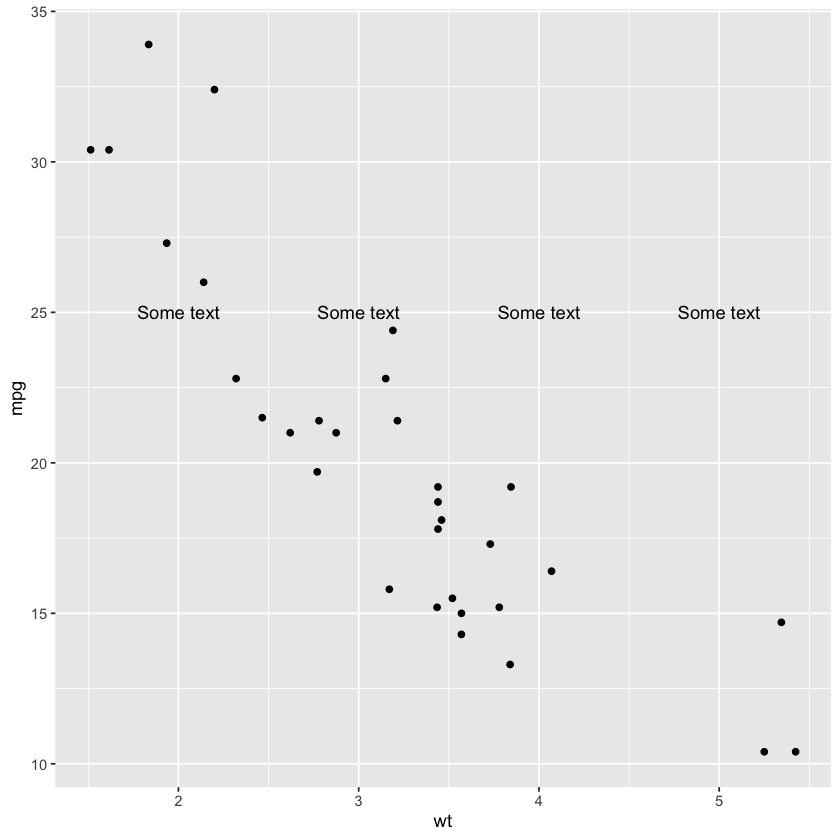

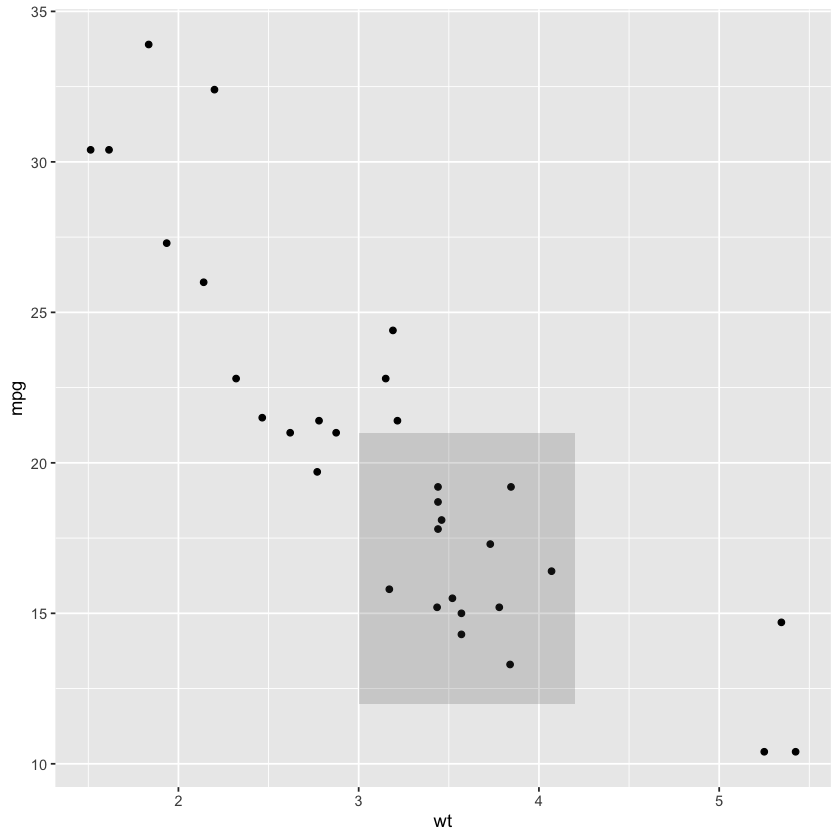

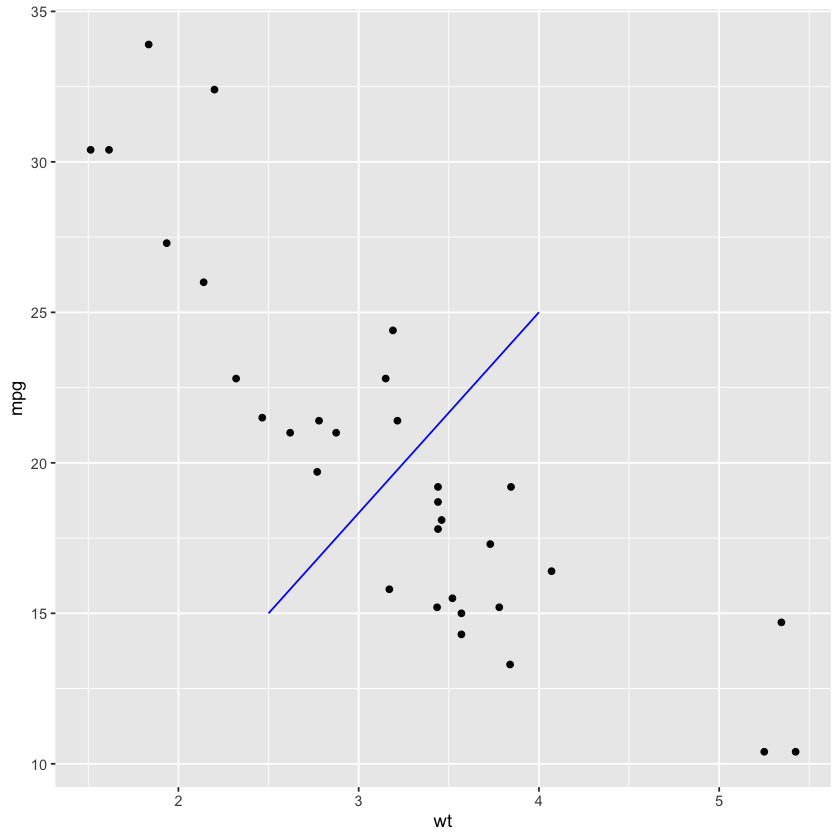

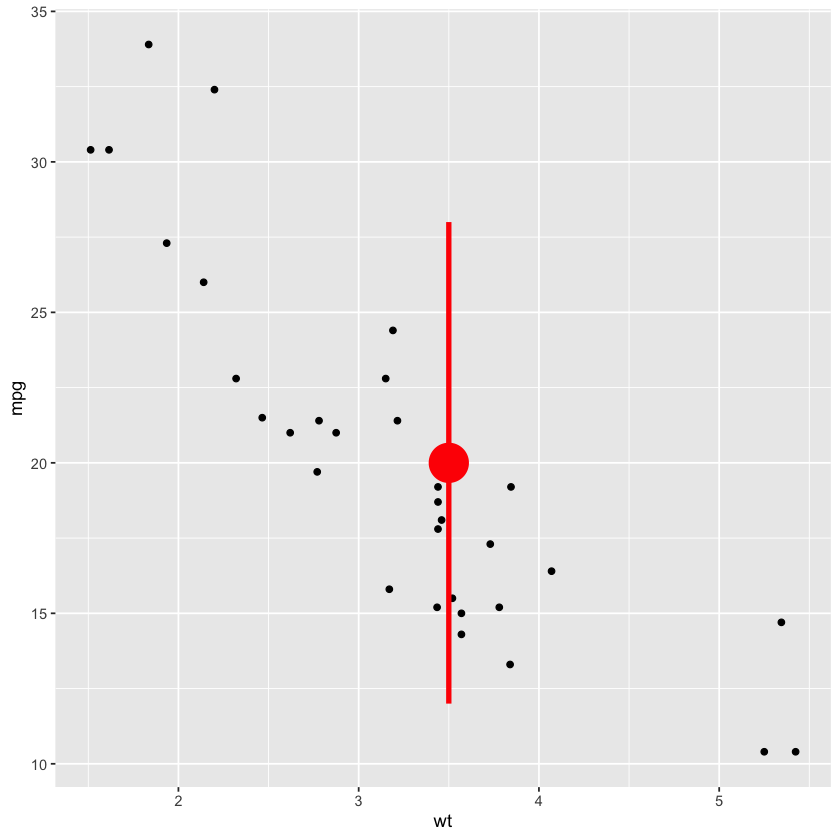

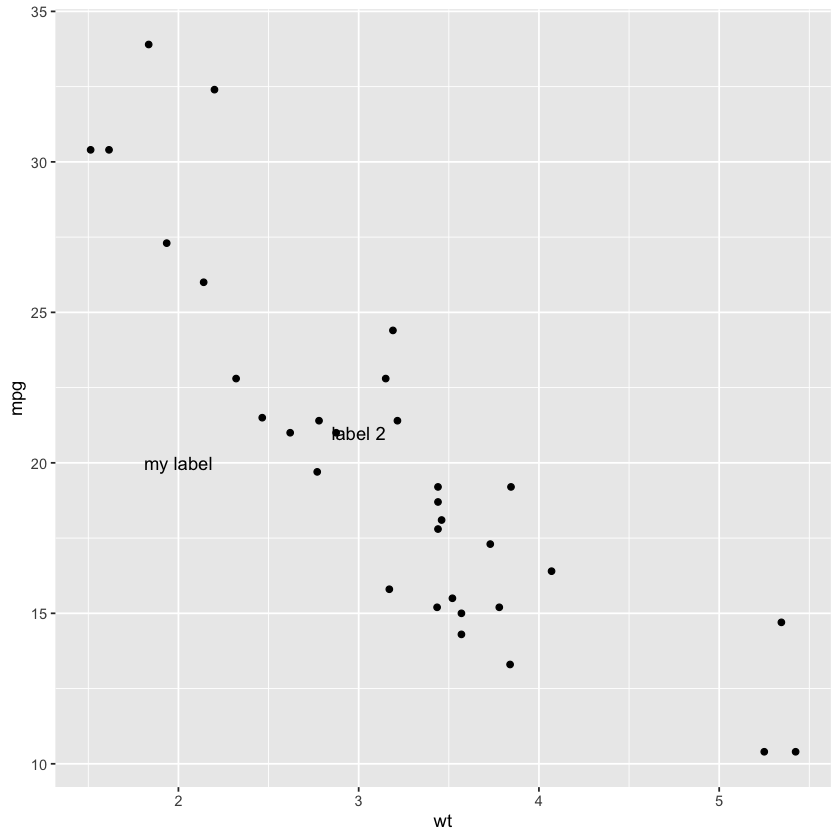

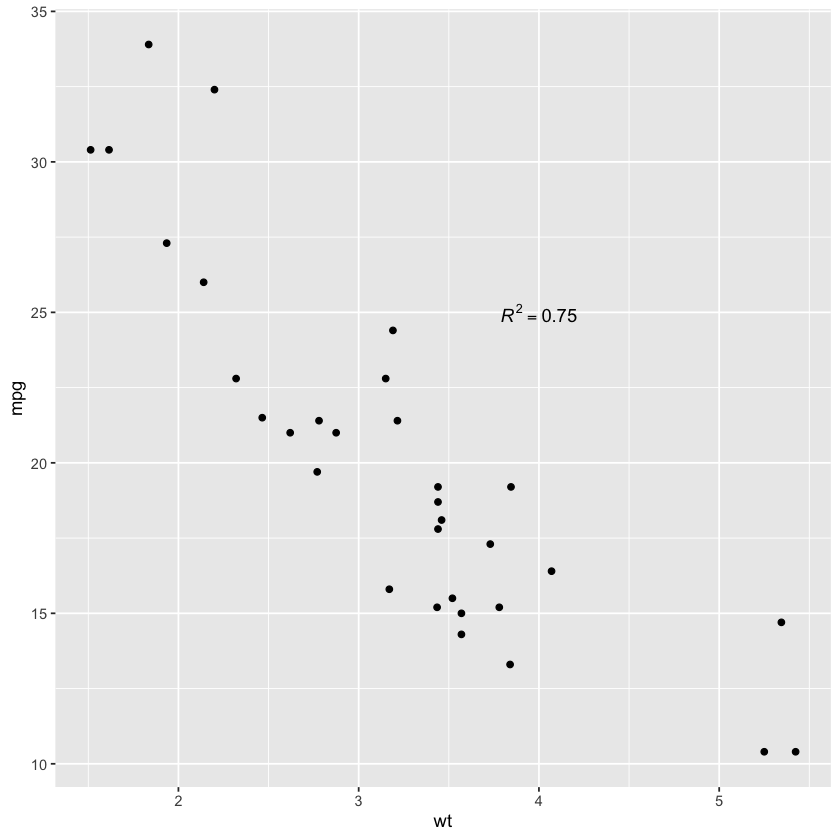

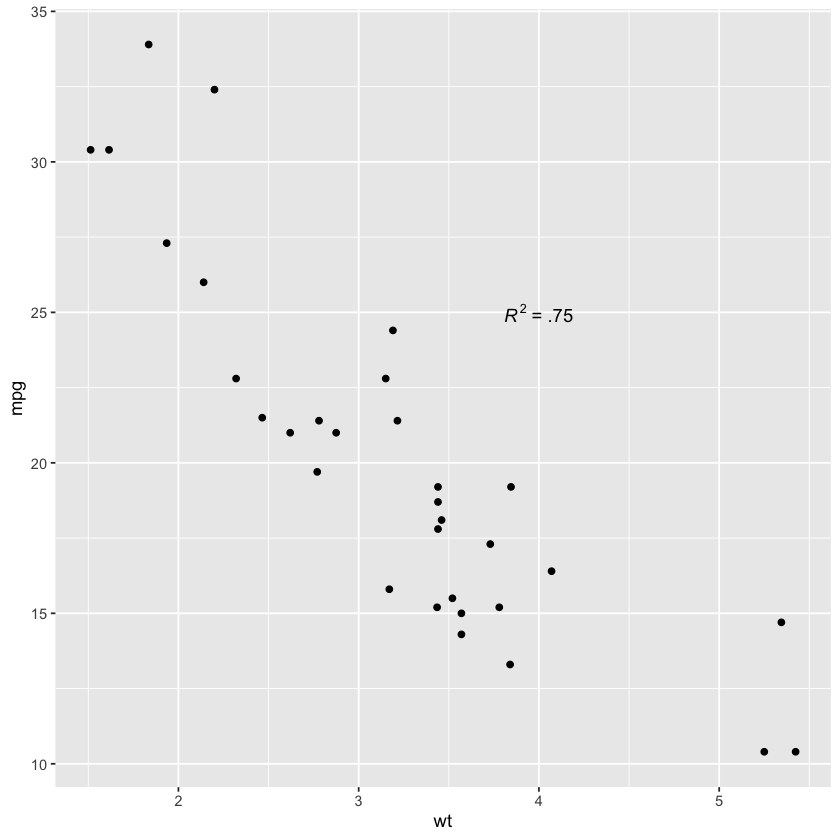

In [35]:
p <- ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point()
p + annotate("text", x = 4, y = 25, label = "Some text")

p + annotate("text", x = 2:5, y = 25, label = "Some text")

p + annotate("rect", xmin = 3, xmax = 4.2, ymin = 12, ymax = 21,
  alpha = .2)

p + annotate("segment", x = 2.5, xend = 4, y = 15, yend = 25,
  colour = "blue")

p + annotate("pointrange", x = 3.5, y = 20, ymin = 12, ymax = 28,
  colour = "red", size = 2.5, linewidth = 1.5)


p + annotate("text", x = 2:3, y = 20:21, label = c("my label", "label 2"))


p + annotate("text", x = 4, y = 25, label = "italic(R) ^ 2 == 0.75",
  parse = TRUE)

p + annotate("text", x = 4, y = 25,
  label = "paste(italic(R) ^ 2, \" = .75\")", parse = TRUE)

